In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union

%matplotlib inline

# Model

In [2]:
class LogisticRegression:
    def __init__(self, rate=0.01, epochs=200, regularization=0, normalize=True, poly_power=2):
        """
        Basic constructor for logistic regression.
        
        Parameters
        ----------
        rate : float (default 0.01)
            Learning rate.
        
        epochs : int (default 200)
            Quantity of gradient steps (iterations).
        
        regulatization : float (default 0)
            Avoid overfitting during learning.
        
        normalize : bool (default True)
            Normalization data to boost convegence.
        
        poly_power : int (default 2)
            Max polynomial power of features.
        
        """
        
        self.rate = rate
        self.regularization = regularization
        self.epochs = epochs
        self.Xtrain = None
        self.normalize = normalize
        self.ytrain = None
        self.Xtest = None
        self.ytest = None
        self.theta = None
        self.poly_power = poly_power 
        self.history = []
    
    @staticmethod
    def hypothesis(X, theta):
        """
        Compute hypothesis using sigmoid function.
        
        Parameters
        ----------
        X : numpy.ndarray, shape (n_samples, n_features)
            Training vector, where n_samples is the number of samples and
            n_features is the number of features.
        
        theta : numpy.ndarray
            Weights for logistic regression.
            
        Returns
        -------
        numpy.ndarray
            Hypothesis or predicted vector of values.
        
        """
        
        h = 1 / (1 + np.e ** (-np.dot(X, theta)))
        h[np.where(h == 0)] = 10 ** -9
        return h
        
    def cost_function(self):
        """Compute loss using cost function."""
        h = self.hypothesis(self.Xtrain, self.theta)
        r = self.regularization / (2 * len(self.Xtrain)) * sum(self.theta ** 2)
        cost = -1 /len(self.Xtrain) * sum(np.dot(self.ytrain.T, np.log(h)) + \
                                          np.dot((1 - self.ytrain).T, np.log(1 - h))) + r
        self.history.append(*cost)
        return cost
    
    def gradient_step(self):
        """Implement one gradient step to the local(global) minimum."""
        self.theta = self.theta - self.rate/len(self.Xtrain) * \
        sum((self.hypothesis(self.Xtrain, self.theta) - self.ytrain) * self.Xtrain).reshape(self.theta.shape) + \
                        self.regularization / len(self.Xtrain) * sum(self.theta)
        
    def gradient_descent(self):
        """Compute gradient descent."""
        for epoch in range(self.epochs):
            self.gradient_step()
            print('Epoch: {} Cost: {}'.format(epoch+1, *self.cost_function()))
    
    @staticmethod
    def normalization(Xtrain: np.ndarray) -> np.ndarray:
        # normalize data.
        return (Xtrain - Xtrain.mean(axis=0)) / (Xtrain.max(axis=0) - Xtrain.min(axis=0))
    
    def _preparation_data(self, Xtrain, ytrain):
        """
        Preprocess data and randomize weights.
        
        Parameters
        ----------
        Xtrain : numpy.ndarray, shape (n_samples, n_features)
            Training vector, where n_samples is the number of samples and
            n_features is the number of features.

        ytrain : numpy.ndarray, shape (n_samples, 1)
            Target relative to X for classification or regression;
            None for unsupervised learning.
        
        """
        
        if self.normalize:
            Xtrain = self.normalization(Xtrain)
        
        for i in range(2, self.poly_power+1):
            new_feature = Xtrain[:, :2] ** i
            Xtrain = np.concatenate([Xtrain, new_feature], axis=1)
        
        self.Xtrain = np.concatenate([np.ones((Xtrain.shape[0], 1)), Xtrain], axis=1)
        self.ytrain = ytrain
        self.theta = np.random.randn(self.Xtrain.shape[1], 1)
    
    def fit(self, Xtrain, ytrain):
        """
        Prepare data and train model.
        
        Parameters
        ----------
        Xtrain : numpy.ndarray, shape (n_samples, n_features)
            Training vector, where n_samples is the number of samples and
            n_features is the number of features.

        ytrain : numpy.ndarray, shape (n_samples, 1)
            Target relative to X for classification or regression;
            None for unsupervised learning.
        
        """
        self._preparation_data(Xtrain, ytrain)
        self.gradient_descent()  
    
    def show_history(self):
        """Plot the history of the cost function during all time of training."""
        
        plt.plot(np.arange(0, self.epochs, 1), self.history, c='r')
        plt.grid(1)
        plt.legend(['Loss'])
        
    def show_plot(self):
        """Plot the model and data points."""
        
        pos = np.where(self.ytrain == 1)[0]
        neg = np.where(self.ytrain == 0)[0]
        
        plt.scatter(self.Xtrain[:, 1][neg], self.Xtrain[:, 2][neg], c='g', marker='+', s=60)
        plt.scatter(self.Xtrain[:, 1][pos], self.Xtrain[:, 2][pos], c='b', marker='*', s=60)
        plt.grid(1)
        new_arange = np.arange(min(self.Xtrain[:, 1]), max(self.Xtrain[:, 1]) + 0.2, 0.2)
        plt.plot(new_arange, - self.theta[0]/self.theta[2] - self.theta[1]/self.theta[2] * new_arange ,c='r')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend(['Yes', 'No', 'Line'])
        plt.title('Plot data')

# Example 1

## Data preparation

In [3]:
X1 = np.arange(1, 51)
X2 = X1 + 20*np.random.randn(*X1.shape)

In [4]:
X1_ = np.arange(51, 101)
X2_ = -X1_ + 20*np.random.randn(*X1_.shape)

In [5]:
X = np.vstack([np.append(X1, X1_), np.append(X2, X2_)]).T

In [6]:
y = np.append(np.ones(50), np.zeros(50))[:, np.newaxis]

In [7]:
pos_ = np.where(y == 1)[0]
neg_ = np.where(y == 0)[0]

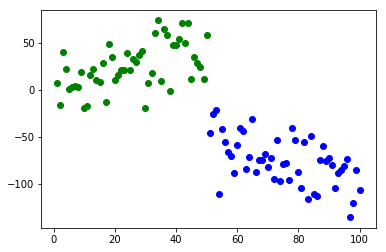

In [8]:
plt.scatter(X[:, 0][pos_], X[:, 1][pos_], c='g')
plt.scatter(X[:, 0][neg_], X[:, 1][neg_], c='b')

## Training model

In [9]:
model = LogisticRegression(rate=0.1, epochs=1000, normalize=True, regularization=0.001, poly_power=4)

In [10]:
model.fit(X, y)

Epoch: 1 Cost: 1.2765640184387381
Epoch: 2 Cost: 1.2594522179195082
Epoch: 3 Cost: 1.2426390213129679
Epoch: 4 Cost: 1.2261259915842755
Epoch: 5 Cost: 1.2099143770946639
Epoch: 6 Cost: 1.1940051059651127
Epoch: 7 Cost: 1.178398781766381
Epoch: 8 Cost: 1.1630956805798998
Epoch: 9 Cost: 1.1480957494623665
Epoch: 10 Cost: 1.1333986063346506
Epoch: 11 Cost: 1.1190035413029473
Epoch: 12 Cost: 1.1049095194072038
Epoch: 13 Cost: 1.0911151847789147
Epoch: 14 Cost: 1.0776188661775727
Epoch: 15 Cost: 1.064418583862636
Epoch: 16 Cost: 1.0515120577459562
Epoch: 17 Cost: 1.0388967167584575
Epoch: 18 Cost: 1.0265697093545654
Epoch: 19 Cost: 1.0145279150686397
Epoch: 20 Cost: 1.002767957029619
Epoch: 21 Cost: 0.9912862153332695
Epoch: 22 Cost: 0.9800788411660147
Epoch: 23 Cost: 0.969141771570277
Epoch: 24 Cost: 0.95847074473867
Epoch: 25 Cost: 0.9480613157231806
Epoch: 26 Cost: 0.9379088724457075
Epoch: 27 Cost: 0.9280086518978446
Epoch: 28 Cost: 0.9183557564205945
Epoch: 29 Cost: 0.9089451699586447


Epoch: 340 Cost: 0.30010716618551075
Epoch: 341 Cost: 0.2995203705118979
Epoch: 342 Cost: 0.29893607260123717
Epoch: 343 Cost: 0.2983542570542195
Epoch: 344 Cost: 0.29777490859174666
Epoch: 345 Cost: 0.2971980120538291
Epoch: 346 Cost: 0.29662355239849303
Epoch: 347 Cost: 0.29605151470070046
Epoch: 348 Cost: 0.29548188415127963
Epoch: 349 Cost: 0.2949146460558665
Epoch: 350 Cost: 0.2943497858338569
Epoch: 351 Cost: 0.2937872890173697
Epoch: 352 Cost: 0.29322714125022065
Epoch: 353 Cost: 0.2926693282869061
Epoch: 354 Cost: 0.2921138359915979
Epoch: 355 Cost: 0.29156065033714773
Epoch: 356 Cost: 0.2910097574041026
Epoch: 357 Cost: 0.2904611433797292
Epoch: 358 Cost: 0.289914794557049
Epoch: 359 Cost: 0.2893706973338827
Epoch: 360 Cost: 0.2888288382119046
Epoch: 361 Cost: 0.2882892037957067
Epoch: 362 Cost: 0.28775178079187186
Epoch: 363 Cost: 0.28721655600805646
Epoch: 364 Cost: 0.28668351635208267
Epoch: 365 Cost: 0.28615264883103947
Epoch: 366 Cost: 0.28562394055039286
Epoch: 367 Cost:

Epoch: 568 Cost: 0.21021803775152403
Epoch: 569 Cost: 0.2099546446402059
Epoch: 570 Cost: 0.20969201532667658
Epoch: 571 Cost: 0.20943014648393257
Epoch: 572 Cost: 0.20916903480398663
Epoch: 573 Cost: 0.20890867699773458
Epoch: 574 Cost: 0.2086490697948235
Epoch: 575 Cost: 0.2083902099435209
Epoch: 576 Cost: 0.2081320942105852
Epoch: 577 Cost: 0.2078747193811369
Epoch: 578 Cost: 0.20761808225853096
Epoch: 579 Cost: 0.20736217966423032
Epoch: 580 Cost: 0.20710700843768048
Epoch: 581 Cost: 0.20685256543618458
Epoch: 582 Cost: 0.20659884753478028
Epoch: 583 Cost: 0.20634585162611718
Epoch: 584 Cost: 0.20609357462033506
Epoch: 585 Cost: 0.2058420134449436
Epoch: 586 Cost: 0.2055911650447028
Epoch: 587 Cost: 0.2053410263815041
Epoch: 588 Cost: 0.20509159443425312
Epoch: 589 Cost: 0.20484286619875267
Epoch: 590 Cost: 0.20459483868758718
Epoch: 591 Cost: 0.20434750893000767
Epoch: 592 Cost: 0.20410087397181806
Epoch: 593 Cost: 0.203854930875262
Epoch: 594 Cost: 0.20360967671891084
Epoch: 595 

Epoch: 804 Cost: 0.16384716261828702
Epoch: 805 Cost: 0.1637008147213191
Epoch: 806 Cost: 0.16355478023328499
Epoch: 807 Cost: 0.1634090581297455
Epoch: 808 Cost: 0.16326364739071317
Epoch: 809 Cost: 0.16311854700062867
Epoch: 810 Cost: 0.16297375594833674
Epoch: 811 Cost: 0.16282927322706248
Epoch: 812 Cost: 0.16268509783438823
Epoch: 813 Cost: 0.16254122877222962
Epoch: 814 Cost: 0.162397665046813
Epoch: 815 Cost: 0.1622544056686517
Epoch: 816 Cost: 0.16211144965252372
Epoch: 817 Cost: 0.16196879601744846
Epoch: 818 Cost: 0.1618264437866645
Epoch: 819 Cost: 0.16168439198760673
Epoch: 820 Cost: 0.16154263965188428
Epoch: 821 Cost: 0.16140118581525825
Epoch: 822 Cost: 0.16126002951761953
Epoch: 823 Cost: 0.16111916980296695
Epoch: 824 Cost: 0.16097860571938563
Epoch: 825 Cost: 0.16083833631902505
Epoch: 826 Cost: 0.16069836065807766
Epoch: 827 Cost: 0.16055867779675767
Epoch: 828 Cost: 0.1604192867992796
Epoch: 829 Cost: 0.1602801867338372
Epoch: 830 Cost: 0.16014137667258233
Epoch: 83

## Cost function

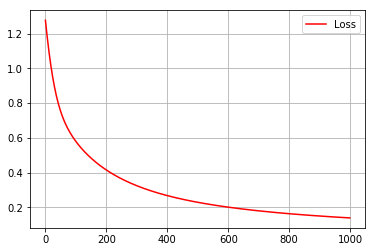

In [11]:
model.show_history()

## Result

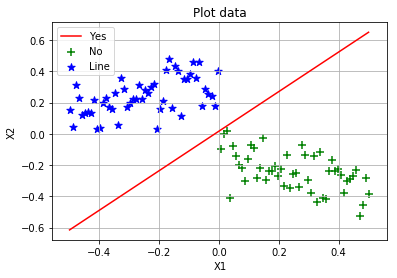

In [12]:
model.show_plot()